<a href="https://colab.research.google.com/github/gxilly/BasicProg_DataViz65/blob/main/%5Bdataprep2%5D_GIS_point_of_interest_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import json
import numpy as np
import geopy.distance

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# json

In [4]:
with open('/content/gdrive/MyDrive/bscdata/7-eleven.json') as json_file:
    this_json = json.loads(json_file.read())

In [5]:
list(this_json.keys())[:10]

['1', '4', '6', '7', '9', '11', '16', '17', '18', '19']

In [6]:
len(this_json)

3653

In [8]:
this_json['1'] #ทดลองเรียก key 1

[]

In [9]:
this_json['6']

[{'business_status': 'OPERATIONAL',
  'geometry': {'location': {'lat': 16.0603149, 'lng': 102.7264856},
   'viewport': {'northeast': {'lat': 16.06160307989272,
     'lng': 102.7278208298927},
    'southwest': {'lat': 16.05890342010728, 'lng': 102.7251211701073}}},
  'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/shopping-71.png',
  'icon_background_color': '#4B96F3',
  'icon_mask_base_uri': 'https://maps.gstatic.com/mapfiles/place_api/icons/v2/convenience_pinlet',
  'name': '7-Eleven',
  'opening_hours': {'open_now': True},
  'photos': [{'height': 3072,
    'html_attributions': ['<a href="https://maps.google.com/maps/contrib/100135907463246314962">nuttapong chinnapuk</a>'],
    'photo_reference': 'ARywPAIuwYgKEeh9_5vpztMT_JbNv0OakveKoYeKCVvX2RyHmpDJw1w05XJIVVx9w5h9Aoai9Gb67AywD7szMyKpXsSzRol2DkngoztlEQu6goN6W2TsbB45jN-38BigXeivHTE4go3fzzTT5urf1wmSYgGzWw4g2IeDHCXM1oHEXvmTRk0Y',
    'width': 1728}],
  'place_id': 'ChIJzbBjEk2BGDER4YEKqD5kwlI',
  'rating': 4,
  'refe

location 7-11 แต่ละที่ location,lat,lng

In [10]:
for t in this_json:
    l = list()
    for x in this_json[t]:
        l.append(x['geometry']['location'])
    print(l)

[]
[]
[{'lat': 16.0603149, 'lng': 102.7264856}, {'lat': 16.0564741, 'lng': 102.7268436}, {'lat': 16.0595413, 'lng': 102.7294307}, {'lat': 16.0751998, 'lng': 102.7356017}, {'lat': 16.070648, 'lng': 102.7344055}, {'lat': 16.0582995, 'lng': 102.7360953}, {'lat': 16.0573901, 'lng': 102.7192322}]
[]
[]
[{'lat': 15.809535, 'lng': 102.6069684}, {'lat': 15.8193062, 'lng': 102.6012589}, {'lat': 15.8125848, 'lng': 102.6009202}, {'lat': 15.8102763, 'lng': 102.5985417}, {'lat': 15.8095537, 'lng': 102.5879272}, {'lat': 15.7970035, 'lng': 102.6075296}]
[{'lat': 16.1340329, 'lng': 102.5331697}, {'lat': 16.1294298, 'lng': 102.540669}]
[{'lat': 16.4052438, 'lng': 102.7823961}, {'lat': 16.3898169, 'lng': 102.8053144}, {'lat': 16.4221806, 'lng': 102.8047853}, {'lat': 16.4083692, 'lng': 102.7948258}, {'lat': 16.4053255, 'lng': 102.7746538}]
[{'lat': 16.4506978, 'lng': 102.7955315}, {'lat': 16.445794, 'lng': 102.8242206}, {'lat': 16.4410003, 'lng': 102.8216208}, {'lat': 16.4600404, 'lng': 102.8247777}, {'l

In [11]:
l

[{'lat': 13.7374346, 'lng': 100.6267268},
 {'lat': 13.7356967, 'lng': 100.6189741},
 {'lat': 13.754974, 'lng': 100.613215},
 {'lat': 13.7607113, 'lng': 100.6292369},
 {'lat': 13.7568211, 'lng': 100.6445227},
 {'lat': 13.7522027, 'lng': 100.6193615},
 {'lat': 13.7366139, 'lng': 100.6313462},
 {'lat': 13.7367845, 'lng': 100.6241795},
 {'lat': 13.7563129, 'lng': 100.6131975},
 {'lat': 13.7523059, 'lng': 100.6182354},
 {'lat': 13.7519672, 'lng': 100.6357339},
 {'lat': 13.7420702, 'lng': 100.6326465},
 {'lat': 13.7623488, 'lng': 100.644072},
 {'lat': 13.7528219, 'lng': 100.6206503},
 {'lat': 13.7609686, 'lng': 100.631794},
 {'lat': 13.74039, 'lng': 100.6252888},
 {'lat': 13.74231, 'lng': 100.6247883},
 {'lat': 13.7602053, 'lng': 100.6220398},
 {'lat': 13.7362923, 'lng': 100.6169101},
 {'lat': 13.7520004, 'lng': 100.6348106}]

In [12]:
c = list()
for row in this_json["6"]:
    c.append(row["geometry"]["location"])

In [13]:
c

[{'lat': 16.0603149, 'lng': 102.7264856},
 {'lat': 16.0564741, 'lng': 102.7268436},
 {'lat': 16.0595413, 'lng': 102.7294307},
 {'lat': 16.0751998, 'lng': 102.7356017},
 {'lat': 16.070648, 'lng': 102.7344055},
 {'lat': 16.0582995, 'lng': 102.7360953},
 {'lat': 16.0573901, 'lng': 102.7192322}]

# load data บ้าน

In [16]:
home = pd.read_excel('/content/gdrive/MyDrive/bscdata/Data Supply.xlsx')
home.head(5)

,post_id,https://nayoo.co/khonkaen/posts/,type,post_type,listing_type,parent_id,draft_for,project_name,contact_name,province_id,...,cable_max,cable_free,cable_none,cable_ask,position_previous,position_current,sold_out_at,created_at,updated_at,deleted_at
0,25.0,https://nayoo.co/khonkaen/posts/25,post,secondhand,sale,NaN,NaN,กันยารัตน์ เดอวินเทจ,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,6.0,...,NaN,NaN,NaN,NaN,991.0,991.0,NaT,2020-06-29 06:25:32,2021-10-10 15:58:05,NaN
1,33.0,https://nayoo.co/khonkaen/posts/33,post,secondhand,sale,NaN,NaN,จันทร์ประเสริฐแกรนด์,NaN,6.0,...,NaN,NaN,NaN,NaN,985.0,985.0,NaT,2020-06-29 06:25:32,2021-10-11 07:41:34,NaN
2,495.0,https://nayoo.co/khonkaen/posts/495,post,secondhand,sale,NaN,NaN,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,1834.0,1834.0,NaT,2020-07-03 04:23:01,2021-09-02 00:02:12,NaN
3,564.0,https://nayoo.co/khonkaen/posts/564,post,secondhand,sale,NaN,NaN,โครงการหมู่บ้านเรา 2,NaN,6.0,...,NaN,NaN,NaN,NaN,1198.0,1367.0,NaT,2020-07-06 13:58:06,2021-07-07 16:20:36,NaN
4,566.0,https://nayoo.co/khonkaen/posts/566,post,secondhand,sale,NaN,NaN,โครงการหมู่บ้านเรา 2,NaN,6.0,...,NaN,NaN,NaN,NaN,1196.0,1365.0,NaT,2020-07-06 13:58:06,2021-07-07 16:20:36,NaN


In [ ]:
#home['post_id'] = home['post_id'].astype('int').astype('str')

In [17]:
this_home = home[home['post_id']==25]
this_home

,post_id,https://nayoo.co/khonkaen/posts/,type,post_type,listing_type,parent_id,draft_for,project_name,contact_name,province_id,...,cable_max,cable_free,cable_none,cable_ask,position_previous,position_current,sold_out_at,created_at,updated_at,deleted_at
0,25.0,https://nayoo.co/khonkaen/posts/25,post,secondhand,sale,NaN,NaN,กันยารัตน์ เดอวินเทจ,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,6.0,...,NaN,NaN,NaN,NaN,991.0,991.0,NaT,2020-06-29 06:25:32,2021-10-10 15:58:05,NaN


In [18]:
seven_id = {}
for t in this_json:
    l = list()
    for x in this_json[t]:
        l.append(x['geometry']['location'])
    print(t) #id
    print(l)
    seven_id[t] = l #สร้างdict (สมาชิก t คือ list l)

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
6284
[]
6285
[{'lat': 16.3280289, 'lng': 102.8466104}]
6286
[]
6289
[]
6290
[]
6291
[{'lat': 16.760925, 'lng': 102.6348166}]
6292
[{'lat': 16.3280289, 'lng': 102.8466104}]
6296
[{'lat': 16.5219606, 'lng': 102.219816}]
6297
[]
6298
[{'lat': 16.4501543, 'lng': 102.7382279}, {'lat': 16.4481776, 'lng': 102.7736213}, {'lat': 16.4496233, 'lng': 102.7578029}, {'lat': 16.4512684, 'lng': 102.7517798}]
6302
[]
6306
[]
6310
[]
6311
[]
6313
[{'lat': 16.4506978, 'lng': 102.7955315}, {'lat': 16.4786388, 'lng': 102.814293}, {'lat': 16.4794698, 'lng': 102.8070934}, {'lat': 16.4423, 'lng': 102.808299}, {'lat': 16.4802561, 'lng': 102.8118345}, {'lat': 16.4800345, 'lng': 102.817991}, {'lat': 16.4800801, 'lng': 102.8157501}, {'lat': 16.4421359, 'lng': 102.8198991}, {'lat': 16.4781927, 'lng': 102.8199828}, {'lat': 16.4463944, 'lng': 102.8200097}]
6316
[]
6319
[{'lat': 16.7035329, 'lng': 103.0785806}, {'lat': 16.7009297, 'lng': 103.0838363}, {'lat': 1

In [19]:
list(seven_id)[:10]

['1', '4', '6', '7', '9', '11', '16', '17', '18', '19']

In [20]:
this_seven = seven_id['25']
this_seven

[{'lat': 16.4229267, 'lng': 102.8712313},
 {'lat': 16.4255945, 'lng': 102.8397278},
 {'lat': 16.4251666, 'lng': 102.8510168},
 {'lat': 16.4075683, 'lng': 102.8597974},
 {'lat': 16.4198307, 'lng': 102.8496996},
 {'lat': 16.4236724, 'lng': 102.8434961},
 {'lat': 16.4059038, 'lng': 102.839094},
 {'lat': 16.4276489, 'lng': 102.867949},
 {'lat': 16.4276748, 'lng': 102.8632914},
 {'lat': 16.4285371, 'lng': 102.8496085},
 {'lat': 16.4187106, 'lng': 102.8405019},
 {'lat': 16.4289683, 'lng': 102.8471979},
 {'lat': 16.4288908, 'lng': 102.8559018},
 {'lat': 16.4288377, 'lng': 102.8542497},
 {'lat': 16.3990089, 'lng': 102.8381851},
 {'lat': 16.4289572, 'lng': 102.8477644},
 {'lat': 16.4268631, 'lng': 102.8371875}]

In [21]:
for i in this_home.columns:
    print(i)

post_id
https://nayoo.co/khonkaen/posts/
type
post_type
listing_type
parent_id
draft_for
project_name
contact_name
province_id
district_id
district
sub_district_id
sub_district
บ้านเดี่ยว/บ้านแฝด
ต่อเติม
renovate
brand
zip_code
zone_id
zone
property_type_id
category
company_id
user_id
user
cover_image
cover_image_path
address_number
village_number
alley
street
route
name_th
name_en
description
excerpt
other_accommodation
logo_image_path
map_image_path
latitude
longitude
quality
quality_previous
standard_quality
create_quality
update_quality
quality_calculate_date
pin_score
approved
status
status_chat
reject_reason
is_review
total_ctr
total_mobile_ctr
total_email_ctr
total_line_ctr
total_facebook_ctr
starting_price
ending_price
number_of_rai
number_of_ngan
number_of_va
construct_year
plan_image_path
post_number
model
sell_price
rent_price
expire_date
expired
close_reason
number_of_unit
number_of_story
number_of_bedroom
number_of_bathroom
usable_area
central_cost
direction
furniture
rent

In [23]:
this_seven[0]

{'lat': 16.4229267, 'lng': 102.8712313}

In [25]:
this_seven[0]['lat']

16.4229267

In [26]:
this_home['latitude']

0    16.410179
Name: latitude, dtype: float64

In [27]:
this_home['longitude']

0    102.857613
Name: longitude, dtype: float64

In [28]:
#import geopy.distance #หาระยะห่างระหว่างจุด 2 จุด 

7-11 กับบ้าน

In [29]:
geopy.distance.geodesic([this_home['latitude'][0],this_home['longitude'][0]],[this_seven[0]['lat'],this_seven[0]['lng']]).m

2026.3410640485051

In [30]:
loc1 = [this_home['latitude'][0],this_home['longitude'][0]]
loc2 = [this_seven[0]['lat'],this_seven[0]['lng']]

In [31]:
geopy.distance.geodesic(loc1,loc2).m

2026.3410640485051

รัศมี 250 มีกี่เซเว่น

# HW4 สร้างตารางนี้

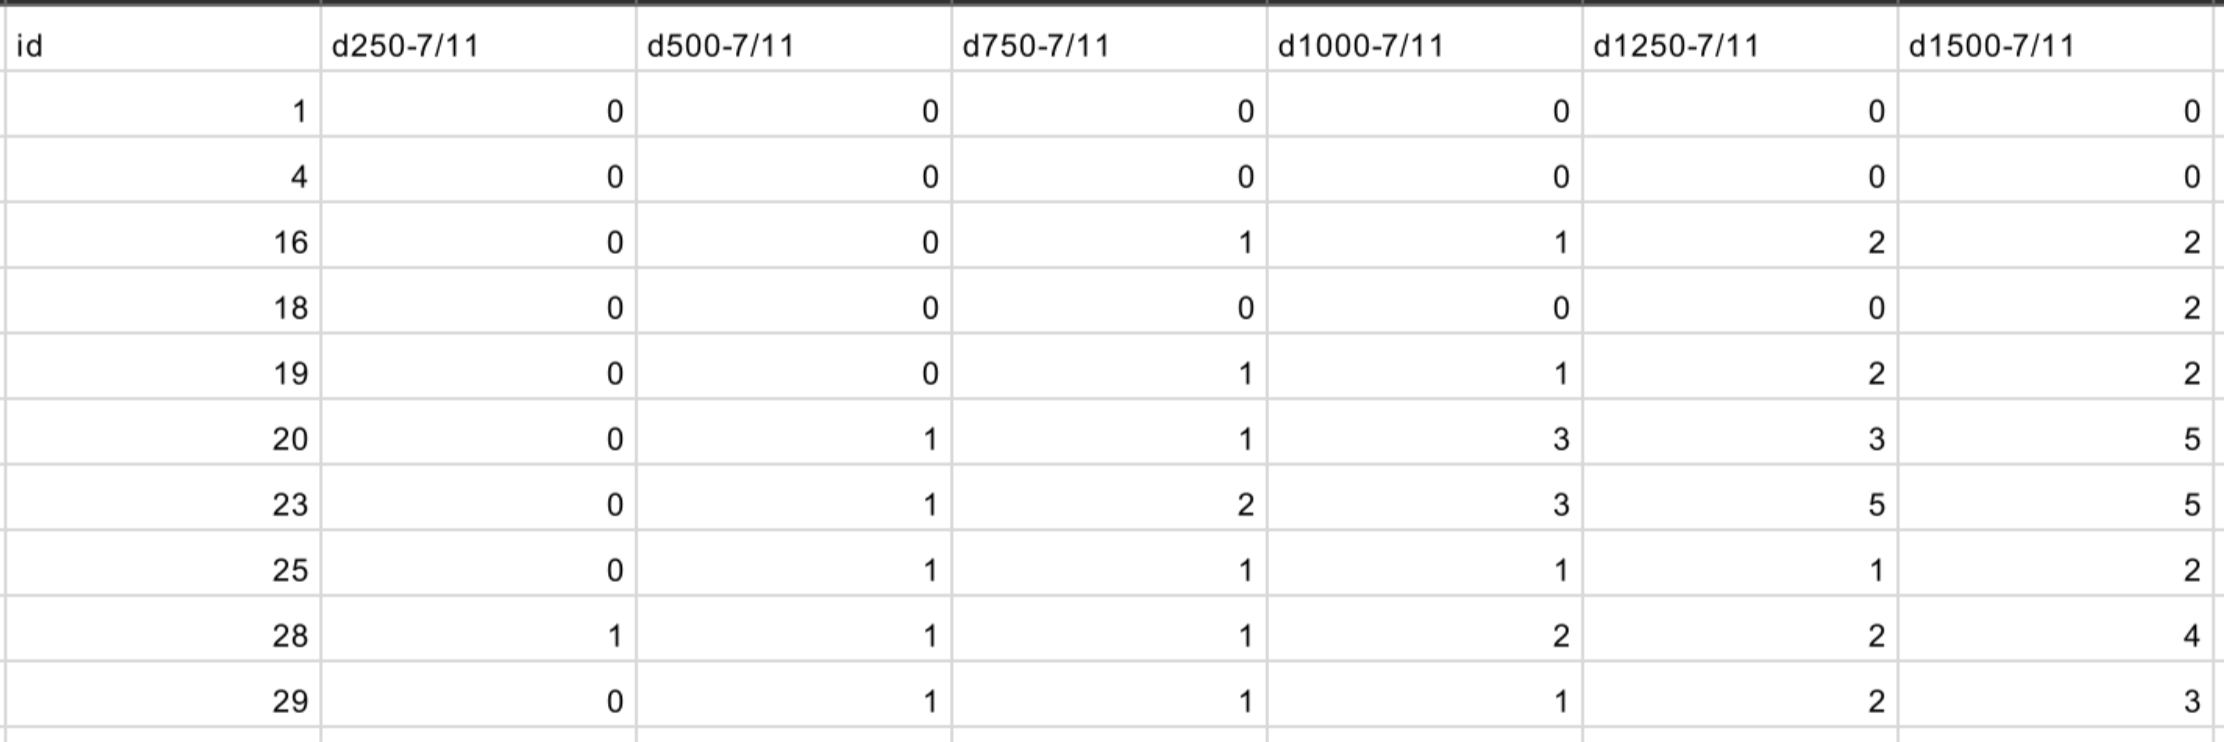

ทดลองโค้ด

ทำยังไงก็ได้ให้ชนิดตัวแปรตรงกัน

In [101]:
id = 25 #int

In [107]:
type(id2)

str

In [106]:
id2 = str(id)

In [102]:
#id = '25' #str
#this_home = home[home['post_id']==int(id)]

In [72]:
this_home = home[home['post_id']== id]
this_home

,post_id,https://nayoo.co/khonkaen/posts/,type,post_type,listing_type,parent_id,draft_for,project_name,contact_name,province_id,...,cable_max,cable_free,cable_none,cable_ask,position_previous,position_current,sold_out_at,created_at,updated_at,deleted_at
0,25.0,https://nayoo.co/khonkaen/posts/25,post,secondhand,sale,NaN,NaN,กันยารัตน์ เดอวินเทจ,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,6.0,...,NaN,NaN,NaN,NaN,991.0,991.0,NaT,2020-06-29 06:25:32,2021-10-10 15:58:05,NaN


In [89]:
h_lat =this_home['latitude'].values[0] #.valuesเพื่อให้ทำงานได้กับทุก record
h_lng =this_home['longitude'].values[0] 

In [79]:
this_seven = seven_id[str(id)] #str

In [80]:
this_seven

[{'lat': 16.4229267, 'lng': 102.8712313},
 {'lat': 16.4255945, 'lng': 102.8397278},
 {'lat': 16.4251666, 'lng': 102.8510168},
 {'lat': 16.4075683, 'lng': 102.8597974},
 {'lat': 16.4198307, 'lng': 102.8496996},
 {'lat': 16.4236724, 'lng': 102.8434961},
 {'lat': 16.4059038, 'lng': 102.839094},
 {'lat': 16.4276489, 'lng': 102.867949},
 {'lat': 16.4276748, 'lng': 102.8632914},
 {'lat': 16.4285371, 'lng': 102.8496085},
 {'lat': 16.4187106, 'lng': 102.8405019},
 {'lat': 16.4289683, 'lng': 102.8471979},
 {'lat': 16.4288908, 'lng': 102.8559018},
 {'lat': 16.4288377, 'lng': 102.8542497},
 {'lat': 16.3990089, 'lng': 102.8381851},
 {'lat': 16.4289572, 'lng': 102.8477644},
 {'lat': 16.4268631, 'lng': 102.8371875}]

คำนวณระยะทางระหว่างแต่ละ 7-11 กับ บ้าน

In [48]:
seven_dist = list()
loc1 = [h_lat, h_lng] #ไม่ต้องเปลี่ยนค่า
for seven in this_seven:
    loc2 = [seven['lat'],seven['lng']] #ต้องเปลี่ยนค่า
    dist = geopy.distance.geodesic(loc1,loc2).m
    seven_dist.append(dist) #list ที่ชื่อว่า seven_dist

In [49]:
seven_dist

[2026.3410640485051,
 2561.1300438835406,
 1802.022379353695,
 371.3607033942288,
 1362.068179007474,
 2122.0746378621734,
 2033.8379723813946,
 2226.324543949096,
 2028.9546247130654,
 2204.142864576839,
 2057.0874274932844,
 2358.161790753285,
 2078.784658007895,
 2095.8694500771535,
 2415.419008344456,
 2329.134777870196,
 2858.020875919802]

np เกี่ยวกับ matrix

In [51]:
np.array(seven_dist) < 500 #F ไม่ Tใช่

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [52]:
sum(np.array(seven_dist) < 500) # T เป็น 1 F เป็น 0

1

In [53]:
sum(np.array(seven_dist) < 2000)

3

In [65]:
def cal_seven_radius(seven_dist_list,radius): 
    num = 0
    for seven in seven_dist_list:
        if seven < radius:
            num = num + 1
        return num

In [66]:
cal_seven_radius(seven_dist,500)

0

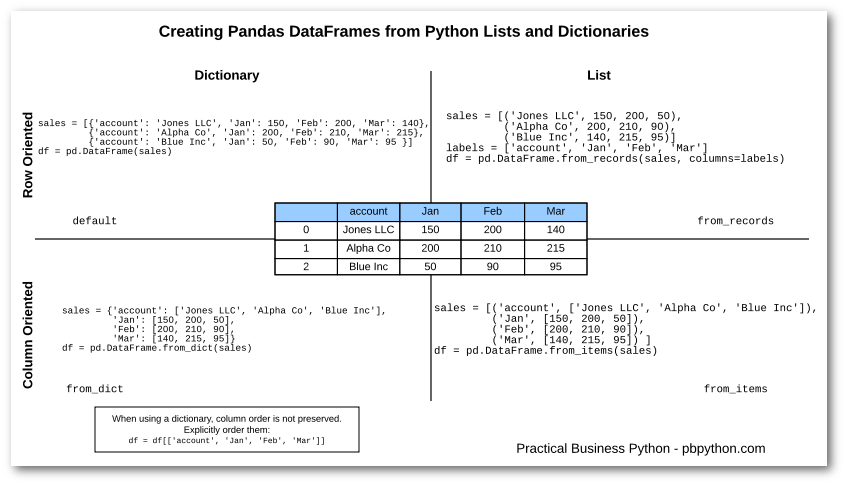

เตรียมโค้ด

In [54]:
record_list = list() #list

In [56]:
record_dict = {} #dict
record_dict ['id'] = int(id)
record_dict ['d250-7/11'] = sum(np.array(seven_dist) < 250)
record_dict ['d500-7/11'] = sum(np.array(seven_dist) < 500)
record_dict ['d750-7/11'] = sum(np.array(seven_dist) < 750)
record_dict ['d1000-7/11'] = sum(np.array(seven_dist) < 1000)
record_dict ['d1250-7/11'] = sum(np.array(seven_dist) < 1250)
record_dict ['d1500-7/11'] = sum(np.array(seven_dist) < 1500)

In [57]:
record_dict

{'id': 25,
 'd250-7/11': 0,
 'd500-7/11': 1,
 'd750-7/11': 1,
 'd1000-7/11': 1,
 'd1250-7/11': 1,
 'd1500-7/11': 2}

In [59]:
record_list.append(record_dict)

In [60]:
pd.DataFrame(record_list)

,id,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11
0,25,0,1,1,1,1,2


วนลูปใน home

In [84]:
home['post_id']

0        25.0
1        33.0
2       495.0
3       564.0
4       566.0
       ...   
95    19495.0
96    19496.0
97    20164.0
98       31.0
99      570.0
Name: post_id, Length: 100, dtype: float64

In [90]:
for id in home['post_id']:
    print(id) #ลองดู

25.0
33.0
495.0
564.0
566.0
568.0
597.0
624.0
634.0
656.0
657.0
668.0
676.0
690.0
693.0
694.0
703.0
710.0
760.0
1070.0
1123.0
1128.0
1130.0
1135.0
1143.0
1149.0
1178.0
1402.0
1895.0
1915.0
1959.0
2033.0
2143.0
2244.0
2262.0
3286.0
3340.0
3357.0
3547.0
3617.0
3622.0
3721.0
3897.0
3905.0
5195.0
5978.0
5986.0
5994.0
6003.0
6007.0
6010.0
6017.0
6021.0
6022.0
6034.0
6045.0
6056.0
6069.0
7709.0
7713.0
7733.0
8514.0
8545.0
8682.0
8758.0
8950.0
9066.0
9141.0
9613.0
11264.0
12423.0
12680.0
12710.0
12759.0
13113.0
17128.0
17690.0
17754.0
17755.0
17778.0
17789.0
18092.0
18101.0
18112.0
18305.0
18629.0
18633.0
19450.0
19475.0
19478.0
19480.0
19481.0
19483.0
19492.0
19494.0
19495.0
19496.0
20164.0
31.0
570.0


In [96]:
type(this_seven)

list

In [116]:
record_list = list() #reset new list
for id in home['post_id']:
    #print(id) #ใส่ก็ได้ ไม่ใส่ก็ได้
    this_home = home[home['post_id'] == id] #int
    h_lat =this_home['latitude'].values[0] #.valuesเพื่อให้ทำงานได้กับทุก record
    h_lng =this_home['longitude'].values[0]
    this_seven = seven_id[str(int(id))] #สุดท้ายแล้วจะได้ str (เปลี่ยนจาก int เป็น str)
    seven_dist = list() #สร้างlistว่างไว้ก่อน
    loc1 = [h_lat, h_lng] #ไม่ต้องเปลี่ยนค่า
    for seven in this_seven:
       loc2 = [seven['lat'],seven['lng']] #ต้องเปลี่ยนค่า
       dist = geopy.distance.geodesic(loc1,loc2).m
       seven_dist.append(dist) #list ที่ชื่อว่า seven_dist

    record_dict = {} #dict
    record_dict ['post_id'] = int(id) #add columns
    record_dict ['d250-7/11'] = sum(np.array(seven_dist) < 250) #np ช่วยนับ T F (T=1,F=0)
    record_dict ['d500-7/11'] = sum(np.array(seven_dist) < 500)
    record_dict ['d750-7/11'] = sum(np.array(seven_dist) < 750)
    record_dict ['d1000-7/11'] = sum(np.array(seven_dist) < 1000)
    record_dict ['d1250-7/11'] = sum(np.array(seven_dist) < 1250)
    record_dict ['d1500-7/11'] = sum(np.array(seven_dist) < 1500)
    record_list.append(record_dict) 

final_table = pd.DataFrame(record_list)

In [115]:
home.head(3)

,post_id,https://nayoo.co/khonkaen/posts/,type,post_type,listing_type,parent_id,draft_for,project_name,contact_name,province_id,...,cable_max,cable_free,cable_none,cable_ask,position_previous,position_current,sold_out_at,created_at,updated_at,deleted_at
0,25.0,https://nayoo.co/khonkaen/posts/25,post,secondhand,sale,NaN,NaN,กันยารัตน์ เดอวินเทจ,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,6.0,...,NaN,NaN,NaN,NaN,991.0,991.0,NaT,2020-06-29 06:25:32,2021-10-10 15:58:05,NaN
1,33.0,https://nayoo.co/khonkaen/posts/33,post,secondhand,sale,NaN,NaN,จันทร์ประเสริฐแกรนด์,NaN,6.0,...,NaN,NaN,NaN,NaN,985.0,985.0,NaT,2020-06-29 06:25:32,2021-10-11 07:41:34,NaN
2,495.0,https://nayoo.co/khonkaen/posts/495,post,secondhand,sale,NaN,NaN,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,1834.0,1834.0,NaT,2020-07-03 04:23:01,2021-09-02 00:02:12,NaN


In [117]:
final_table

,post_id,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11
0,25,0,1,1,1,1,2
1,33,0,1,2,3,5,5
2,495,0,0,0,2,2,3
3,564,0,0,2,4,8,12
4,566,0,1,2,3,4,4
...,...,...,...,...,...,...,...
95,19495,0,2,3,7,10,14
96,19496,0,0,0,1,4,9
97,20164,1,1,2,4,7,9
98,31,0,0,1,3,3,4


# Quiz 6

In [121]:
for i in ['post_id','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking','project_name','district','zone','street','sell_price','d250-7/11','d500-7/11','d750-7/11','d1000-7/11','d1250-7/11','d1500-7/11']:
    print(i)

post_id
number_of_rai
number_of_ngan
number_of_va
number_of_story
number_of_bedroom
number_of_bathroom
direction
furniture
usable_area
number_of_parking
project_name
district
zone
street
sell_price
d250-7/11
d500-7/11
d750-7/11
d1000-7/11
d1250-7/11
d1500-7/11


In [122]:
table_merge = home.merge(final_table, how ='left', left_on='post_id',right_on='post_id') 
print(table_merge.shape)
table_merge.head(3)

(100, 189)


,post_id,https://nayoo.co/khonkaen/posts/,type,post_type,listing_type,parent_id,draft_for,project_name,contact_name,province_id,...,sold_out_at,created_at,updated_at,deleted_at,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11
0,25.0,https://nayoo.co/khonkaen/posts/25,post,secondhand,sale,NaN,NaN,กันยารัตน์ เดอวินเทจ,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,6.0,...,NaT,2020-06-29 06:25:32,2021-10-10 15:58:05,NaN,0,1,1,1,1,2
1,33.0,https://nayoo.co/khonkaen/posts/33,post,secondhand,sale,NaN,NaN,จันทร์ประเสริฐแกรนด์,NaN,6.0,...,NaT,2020-06-29 06:25:32,2021-10-11 07:41:34,NaN,0,1,2,3,5,5
2,495.0,https://nayoo.co/khonkaen/posts/495,post,secondhand,sale,NaN,NaN,NaN,NaN,6.0,...,NaT,2020-07-03 04:23:01,2021-09-02 00:02:12,NaN,0,0,0,2,2,3


In [123]:
table_merge[['post_id','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking','project_name','district','zone','street','sell_price','d250-7/11','d500-7/11','d750-7/11','d1000-7/11','d1250-7/11','d1500-7/11']]

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,district,zone,street,sell_price,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,เมืองขอนแก่น,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,2,3,5,5
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0,0,0,0,2,2,3
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0,0,0,2,4,8,12
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0,0,1,2,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19495.0,0.0,1.0,76.2,2.0,0.0,0.0,0.0,0.0,193.0,...,เมืองขอนแก่น,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,5500000.0,0,2,3,7,10,14
96,19496.0,0.0,2.0,56.8,1.0,0.0,0.0,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,7911000.0,0,0,0,1,4,9
97,20164.0,0.0,1.0,2.0,1.0,4.0,2.0,0.0,0.0,0.0,...,เมืองขอนแก่น,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,2990000.0,1,1,2,4,7,9
98,31.0,0.0,0.0,55.8,2.0,3.0,2.0,0.0,0.0,188.0,...,เมืองขอนแก่น,โนนม่วง-มข.-เลี่ยงเมือง-โนนเรือง,ถนนมิตรภาพ(ทล.2) กม.6+150,4000000.0,0,0,1,3,3,4
